In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

In [21]:
path_file = "diabetes.csv"

In [22]:
label= "Outcome"

In [23]:


def create_dataset(path_file):
    df = pd.read_csv(path_file)
    return df

def create_dataframe_features_selected(df:pd.DataFrame,columns:list):
    return df[columns]

def preprocessing(df, num_features=4, num_tuples=100):
    df=df.drop(columns= ["Age"])
    df=KBestFeaturesSelected(df,num_features)
    df=campionamento(df,num_class_0=num_tuples,num_class_1=num_tuples)
    return df

def campionamento(df, num_class_0=100, num_class_1=100):
    df_filtrato_0 = df[df[label]==0]
    df_campione_0 = df_filtrato_0.sample(n=num_class_0, random_state=42)
    df_filtrato_1 = df[df[label]==1]
    df_campione_1 = df_filtrato_1.sample(n=num_class_1, random_state=42)
    return pd.concat([df_campione_0, df_campione_1], axis=0, ignore_index=True)

def KBestFeaturesSelected(df,k=4):
    X= df.drop(columns=[label])
    y=df[label]
    selector= SelectKBest(f_classif, k=k)
    selector.fit_transform(X,y)
    listKbestColumns= list(X.columns[selector.get_support()])
    return df[listKbestColumns+[label]]


In [24]:
df=create_dataset(path_file)
df=preprocessing(df)

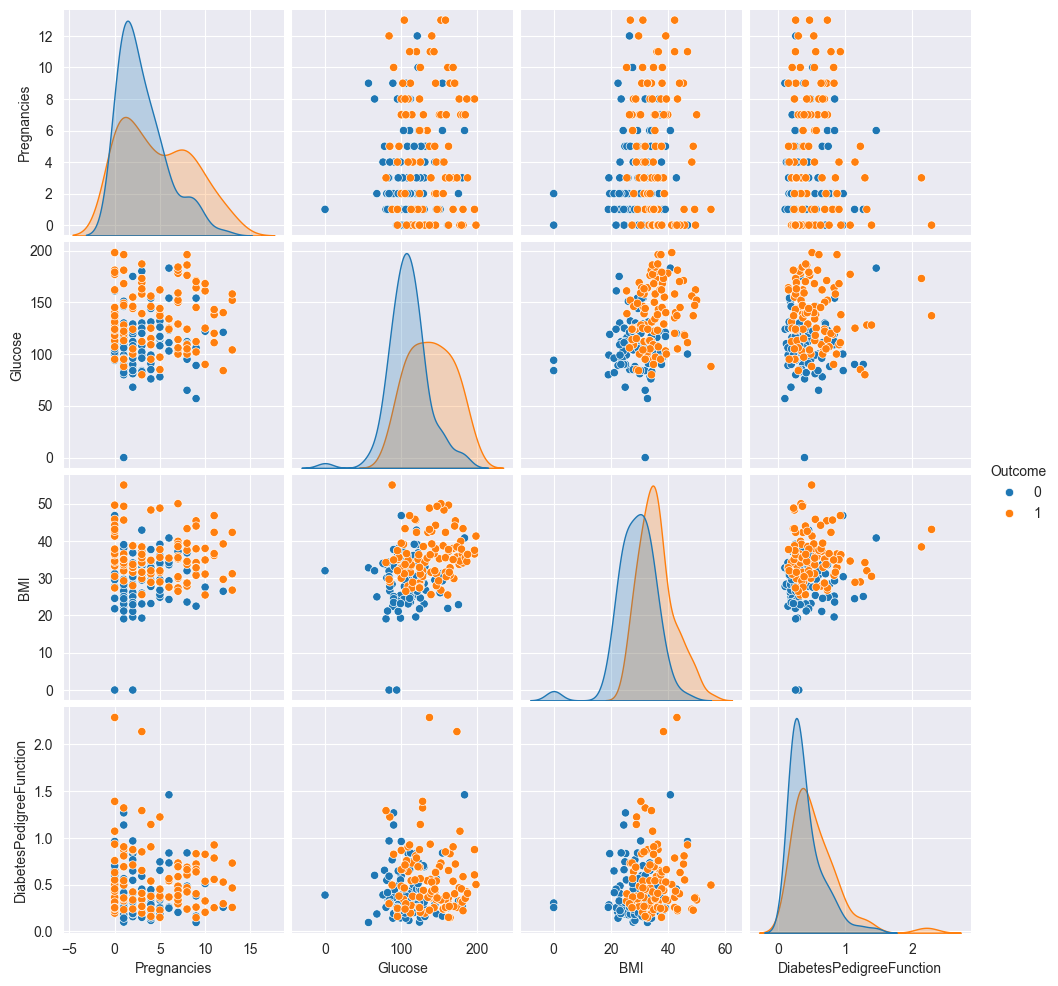

In [25]:
sns.pairplot(df, hue=label, palette="tab10")

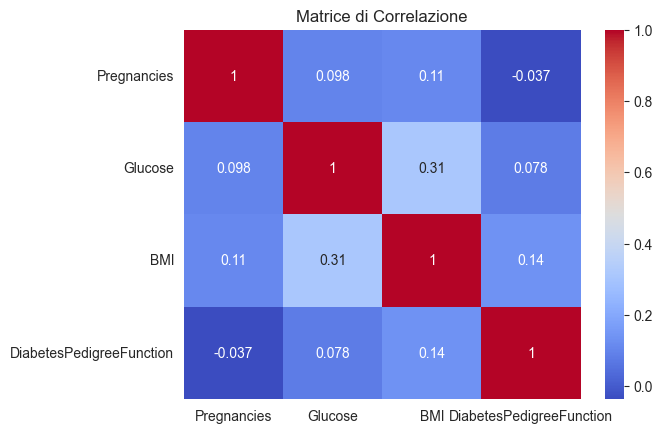

In [26]:
df_corr=df.drop(columns=[label])
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title("Matrice di Correlazione")
plt.show()

In [27]:
n_features=len(list(df.columns))-1

In [28]:
df.to_csv(f'final_diabetes_dataset_{n_features}.csv', index=False)